In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df = pd.read_csv('/content/new_insurance_data (1) (1).csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [236]:
#EDA
# 1. null values
# 2. duplicates
# 3. outliers
# 4. label encoding

In [237]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [238]:
df.dropna(inplace=True)

In [239]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [240]:
df.duplicated().sum()

np.int64(0)

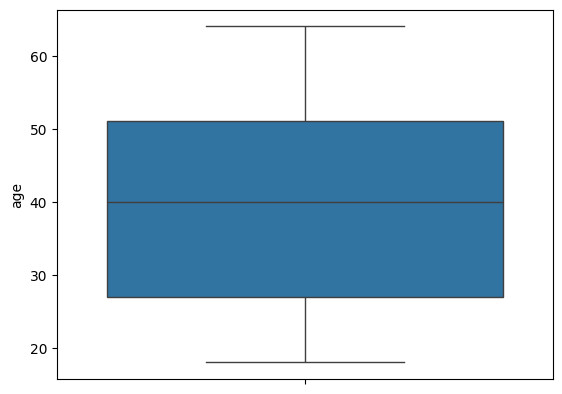

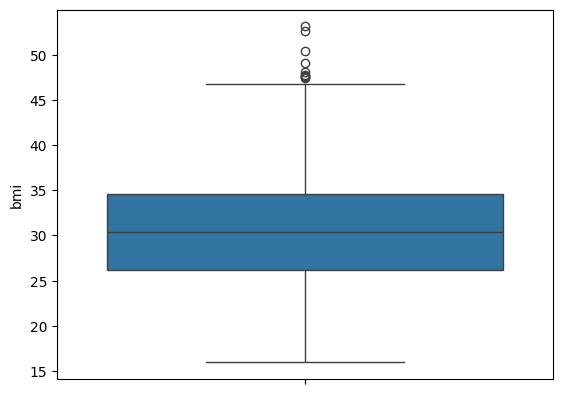

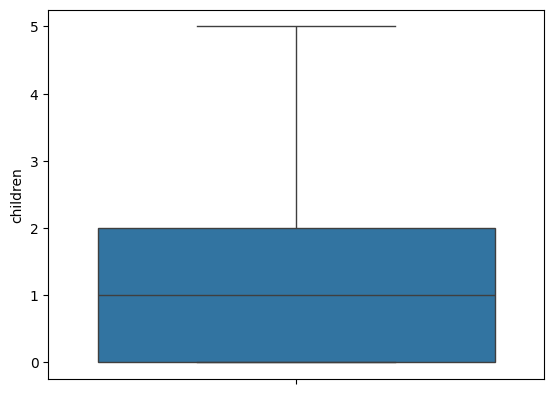

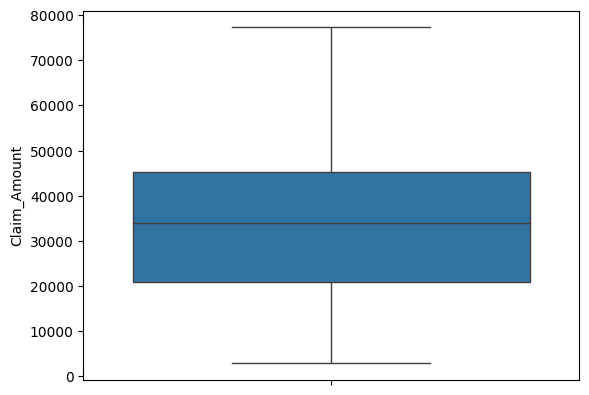

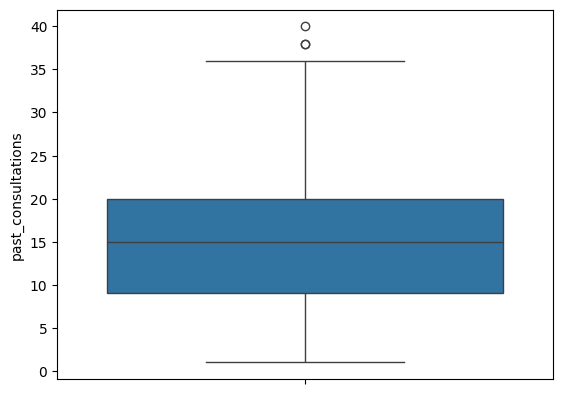

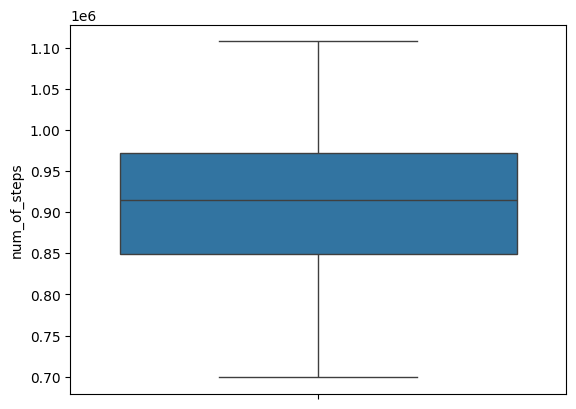

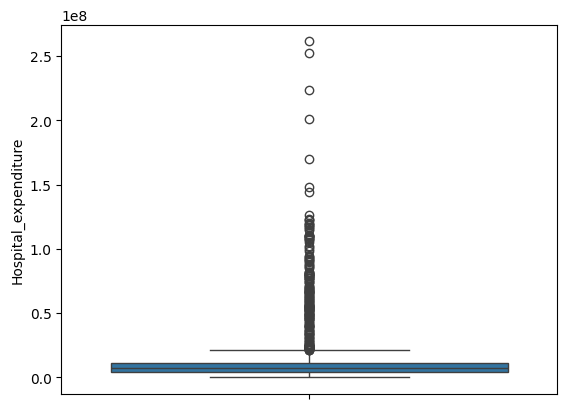

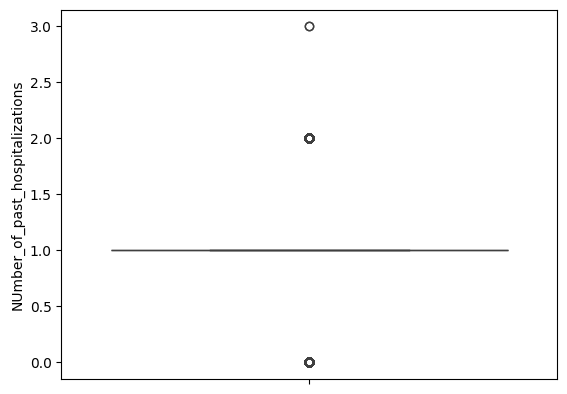

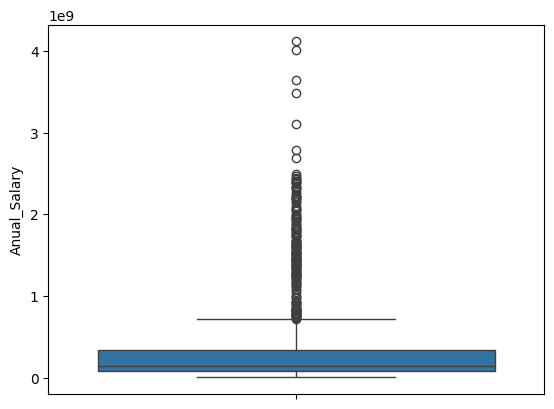

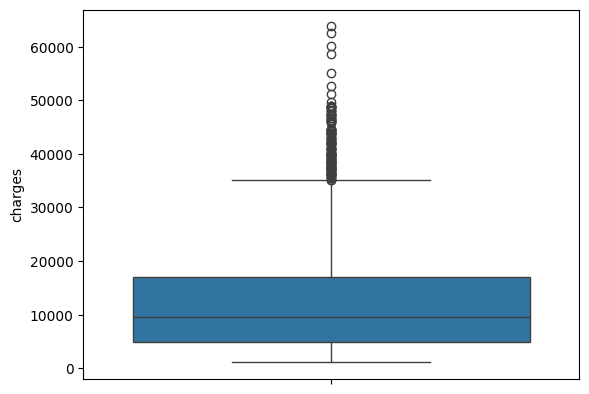

In [241]:
for col in df.columns:
  if (df[col].dtype != 'object'):
    sns.boxplot(df[col])
    plt.show()

In [242]:
out_list = ['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for col in out_list:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  LB = Q1 -1.5* (IQR)
  UB = Q3 + 1.5 * (IQR)
  df = df [(df[col]>=LB) & (df[col]<UB)]

In [243]:
from sklearn.preprocessing import LabelEncoder

In [244]:
le = LabelEncoder()

In [245]:
for col in df.columns:
  if (df[col].dtype =='object'):
    df[col] =le.fit_transform(df[col])

In [246]:
  df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.13,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2,18767.73770
1041,24.0,0,27.60,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3,18955.22017
1046,29.0,0,27.94,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.90,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400


In [247]:
# statement : - Based of 12 columns build a model which will predict the charges values
x = df.drop('charges',axis =1)
y = df ['charges']

In [248]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.13,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2
1041,24.0,0,27.60,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3
1046,29.0,0,27.94,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.90,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3


In [249]:
out_list = ['bmi','past_consultations','Hospital_expenditure', 'Anual_Salary']
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR =   Q3-Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
df = df[(df[col]>=LB)& (df[col]<=UB)]

In [250]:
from sklearn.preprocessing import LabelEncoder

In [251]:
le = LabelEncoder()

In [252]:
for col in df.columns:
  if(df[col].dtype =='object'):
    df[col] = le.fit_transform(df[col])

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 1050
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              986 non-null    float64
 1   sex                              986 non-null    int64  
 2   bmi                              986 non-null    float64
 3   children                         986 non-null    float64
 4   smoker                           986 non-null    int64  
 5   Claim_Amount                     986 non-null    float64
 6   past_consultations               986 non-null    float64
 7   num_of_steps                     986 non-null    float64
 8   Hospital_expenditure             986 non-null    float64
 9   NUmber_of_past_hospitalizations  986 non-null    float64
 10  Anual_Salary                     986 non-null    float64
 11  region                           986 non-null    int64  
 12  charges                   

In [254]:
#Statement :- Based of 12 columns build a model which will predict the charges value
x=df.drop('charges',axis=1)
y=df['charges']

In [255]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.13,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2
1041,24.0,0,27.60,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3
1046,29.0,0,27.94,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.90,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3


In [256]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1036,18767.73770
1041,18955.22017
1046,19107.77960
1048,19199.94400


In [257]:
from sklearn.model_selection import train_test_split


In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [259]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
269,22.0,1,19.950,3.0,0,46464.832220,3.0,827067.0,7.843290e+06,1.0,3.423338e+07,0
610,47.0,0,24.320,0.0,0,12207.161840,7.0,914552.0,3.474461e+06,1.0,1.607867e+08,0
76,20.0,0,29.600,0.0,0,6880.234658,9.0,741432.0,3.262927e+06,0.0,4.053060e+07,3
832,58.0,0,29.000,0.0,0,31882.260430,19.0,944713.0,9.406758e+06,1.0,2.247415e+08,3
458,40.0,1,29.355,1.0,0,24614.311980,10.0,881505.0,6.775857e+06,1.0,4.088506e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
820,56.0,0,35.800,1.0,0,38655.635040,19.0,928213.0,4.734405e+06,1.0,2.259281e+08,3
823,34.0,1,27.000,2.0,0,47842.838930,18.0,928674.0,5.529792e+06,1.0,2.174552e+08,3
1000,64.0,0,30.115,3.0,0,41647.106600,18.0,983806.0,1.357017e+07,1.0,3.591399e+08,1
552,42.0,0,33.155,1.0,0,49915.589060,21.0,890666.0,5.218625e+06,1.0,6.162293e+07,0


In [260]:
y_train

,charges
269,4005.42250
610,8534.67180
76,1875.34400
832,11842.44200
458,6393.60345
...,...
820,11674.13000
823,11737.84884
1000,16455.70785
552,7639.41745


In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
model = LinearRegression()

In [263]:
model.fit(x_train,y_train)

LinearRegression()

In [264]:
 model_answers=model.predict(x_test)

In [265]:
model_answers

array([ 6295.33716043,    59.89365344, 15061.41997703, 15447.83977883,
       10292.41155273,  2001.23911141, 12693.48692009,  9354.20999604,
        -464.06758   ,  5556.30489629,  4256.64994566, 10877.52334534,
        3458.30118241, 12877.2402843 , 11056.14706639,  8917.68714631,
       11899.09425592,  5391.98627531,  5209.45271625,  9433.92483124,
        5031.30385777,  4195.47075542, 11205.04826349,  2132.72814974,
       11965.00923137, 10408.2590212 , 17092.05832164, 10210.01936629,
       13355.10562628, 11244.32901802,  1899.14113304,  8776.3962495 ,
       12286.42838382, 14555.32608324, 13794.9021024 ,  1554.24564853,
       15573.77600208, 13856.41112371,  6711.56567877, 12316.64906845,
        7316.58502459, 12922.62469606,  4992.36764871, 16266.57755041,
        3184.17130122, 12344.40080136,  2914.83285022, 10244.6078872 ,
        9970.17809595,  9265.25549371,  5632.62908887,  3378.145404  ,
       12382.71168059, 18574.0683236 , 12740.36240174,  4862.5988114 ,
      

In [266]:
from sklearn.metrics import r2_score

In [267]:
r2_score(model_answers,y_test)*100  #r2_score --> its a method used to check closeness between two variables

97.15327721991069

In [268]:
# actual =1119, predict = 1118

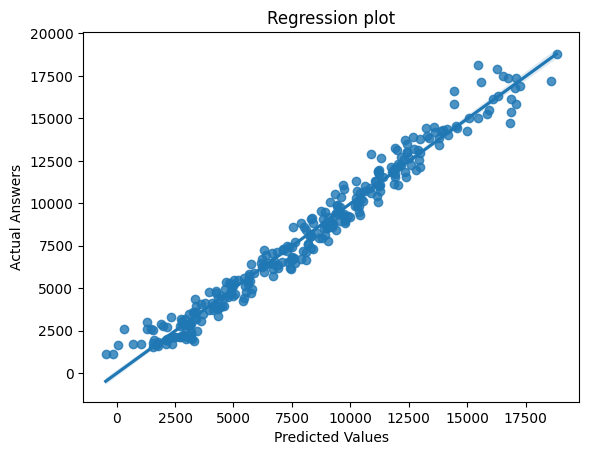

In [269]:
sns.regplot(x=model_answers,y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Answers')
plt.title("Regression plot")
plt.show()

In [270]:
Ajinkya=[27,1,25.600,0.0,0,30825.190070,9.0,821360.0,5.923489e+06,0.0,7.490390e+07,2]

In [271]:
aj_data=pd.DataFrame(columns=x_train.columns)
aj_data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region


In [272]:
aj_data.loc[0]=Ajinkya

In [273]:
aj_data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,27.0,1.0,25.6,0.0,0.0,30825.19007,9.0,821360.0,5923489.0,0.0,74903900.0,2.0


In [274]:
answer=model.predict(aj_data)

In [275]:
answer

array([5612.72255042])